# Homework 2 Regression Refresher

In class, we considered a very simply algorithm called gradient descent that we used to estimate the parameters of a simple linear model. But we left many considerations open. These include:
- Normalization 
    - We saw that the SSE is a very big number in our example, leading us to choose awkwardly small learning rates. Normaling the error may help us use more reasonably sized learning rates.
- When to stop
    - We can tell the algorithm to stop after a set number of iterations or, something smarter, tell it to stop when it begins to take very small step sizes
- Multiple solutions
    - It should be obvious that gradient descent, as an algorithm, doesn't do much "thinking". 
    - If there are multiple solutions, it will only find one
        

## Problem 1 - Use gradient descent to identify multiple minima

Regression algorithms ultimately search for minima. This can be where an error function is minimized (as we saw in class) or when a polynomial equation is minimized. Using the code from our lecture, adapt the code in order to indentify the roots of the following equation: 

$x^3 - 6x^2 +11x = 6$
  
- Look at homework 1 for how to tackle this problem.
- Since the polynomial will have more than 1 solution, be sure to consider multiple starting guesses. 
- Use the "roots" function from numpy to check your answer. Roots is especially designed for polynomials and should find all roots.

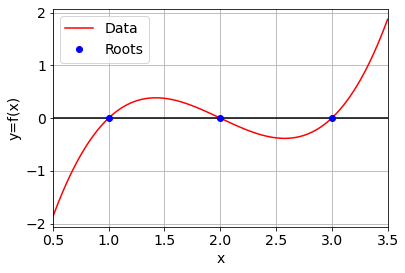

In [54]:
from scipy.optimize import fsolve

x=np.linspace(0.5,3.5,100)
y = x**(3)-6*x**(2)+11*x-6

x0=(0.5,3.5)
y0=(0,0)

x1=(1,2,3)
y1=(0,0,0)

plt.plot(x, y,'r-', label = "Data")
plt.plot(x0, y0,'-k')
plt.plot(x1, y1,'bo', label = "Roots")
plt.xlabel("x");
plt.ylabel("y=f(x)");
plt.legend();
plt.xlim([0.5,3.5]);
plt.grid()

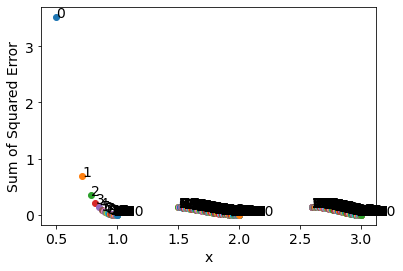

In [88]:
import numpy as np;
import math
import matplotlib.pyplot as plt

def SSE(x):
    err = x**(3)-6*x**(2)+11*x-6
    SSE = np.sum(err**2);
    return SSE;

def derivative(x):
    DERIVATIVE = (SSE(x+0.001)-SSE(x))/0.001;
    return DERIVATIVE

derivative(.6)

n1 = 0;
current_x1 = .5;
rate1 = 0.01; 
plt.plot(current_x1, SSE(current_x1),'o');
plt.text(current_x1, SSE(current_x1),n1);

while n1 < 100:
    new_x1 = current_x1 - rate * derivative(current_x1);
    current_x1=new_x1;
    n1 = n1 + 1;
    plt.plot(new_x1, SSE(new_x1),'o');
    plt.text(new_x1, SSE(new_x1),n1);
    
n2 = 0;
current_x2 = 1.5;
rate1 = 0.01; 
plt.plot(current_x2, SSE(current_x2),'o');
plt.text(current_x2, SSE(current_x2),n2);

while n2 < 1000:
    new_x2 = current_x2 - rate * derivative(current_x2);
    current_x2=new_x2;
    n2 = n2 + 1;
    plt.plot(new_x2, SSE(new_x2),'o');
    plt.text(new_x2, SSE(new_x2),n2);
    
n3 = 0;
current_x3 = 2.6;
rate1 = 0.01; 
plt.plot(current_x3, SSE(current_x3),'o');
plt.text(current_x3, SSE(current_x3),n3);

while n3 < 1000:
    new_x3 = current_x3 - rate * derivative(current_x3);
    current_x3=new_x3;
    n3 = n3 + 1;
    plt.plot(new_x3, SSE(new_x3),'o');
    plt.text(new_x3, SSE(new_x3),n3);
    
plt.xlabel("x");
plt.ylabel("Sum of Squared Error");


## Problem 2 - Linear regression can be used to analyze "groups"

In class, we used linear regression to fit a linear model to height and weight data. In this case, the measurements (x) and the outcomes (y) are continuous. Linear regression is also commonly used to analyze groups, wherein the measurements are not continous. For example, we may have measured the height of persons who did or did not eat asparagus when they were young. In this case, x is discrete - a collection of 1's and 0's. 

Let's use linear regression to analyze the miles per gallon achieved by select type of cars. Download the data from https://gist.github.com/noamross/e5d3e859aa0c794be10b. We want to determine if 8 cylinder vehicles get less gas mileage than 4 and 6 cylinder cars. Cyl = cylinders; MPG = miles per gallon on the table.

### a) Write the code to determine the average MPG for 8 cylinder vehicles vs 4/6 cyl vehicle.
Be sure the mean values are clearly identified or report them in a new markup cell below the code. Be sure that you are treating 4 and 6 cyl vehicles as one group.

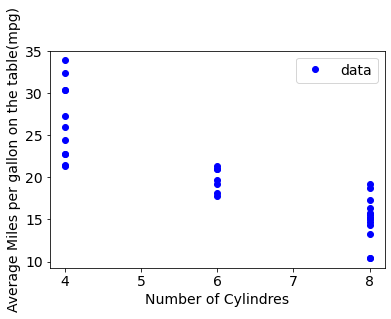

In [56]:
import pandas as pd
import numpy as np;
import math
import matplotlib.pyplot as plt

df = pd.read_csv (r'C:\Users\advay\OneDrive\Desktop\PhD\Term-1\Mathematical Modelling in Chemical Engineering\cars.csv')

data_y=df['mpg']
data_x=df['cyl']

mean=np.mean(data_x)

plt.plot(data_x, data_y,'bo', label = "data");
plt.ylabel("Average Miles per gallon on the table(mpg)");
plt.xlabel("Number of Cylindres");
plt.legend();


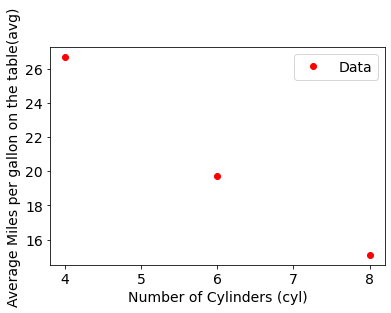

In [57]:
a1=data_y[data_x == 4]

a2=data_y[data_x == 6]

a3=data_y[data_x == 8]

m1=np.mean(a1)

m2=np.mean(a2)

m3=np.mean(a3)

X=np.array([4,6,8])
Y=np.array([m1,m2,m3])

plt.plot(X, Y,'ro', label = "Data");
plt.xlabel("Number of Cylinders (cyl)");
plt.ylabel("Average Miles per gallon on the table(avg)");
plt.legend();

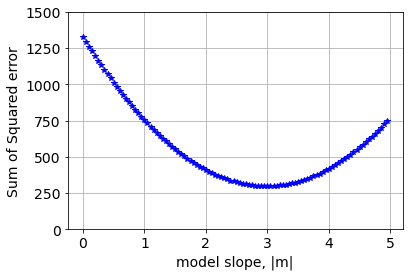

In [58]:
for m in np.arange(0,5,.05):
    Y1 = m*X;
    err = Y1 - Y;
    SSE = np.sum(err**2);
    plt.plot(m, SSE,'b*');
      
plt.grid()    
plt.rcParams.update({'font.size': 14})  # increase the font size
plt.ylim([0,1500]);
plt.xlabel("model slope, |m|")
plt.ylabel("Sum of Squared error");

In [59]:
import statsmodels.api as sm
model = sm.OLS(Y, sm.add_constant(X)).fit()

# erase the add constant above to remove the intercept of the model.
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     77.31
Date:                Tue, 13 Sep 2022   Prob (F-statistic):             0.0721
Time:                        13:39:12   Log-Likelihood:                -2.3910
No. Observations:                   3   AIC:                             8.782
Df Residuals:                       1   BIC:                             6.979
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.8476      2.044     18.512      0.0

C:\Users\advay\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


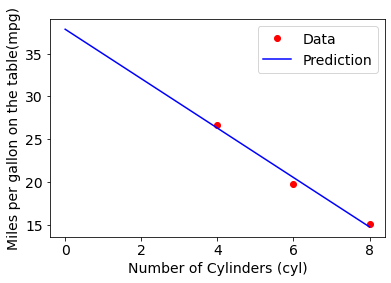

In [60]:
m=-2.8909 
c= 37.8476
Xl=np.linspace(0,8,1000)
Yl=m*Xl+c
plt.plot(X, Y,'ro', label = "Data");
plt.plot(Xl, Yl,'b-', label = "Prediction");
plt.xlabel("Number of Cylinders (cyl)");
plt.ylabel("Miles per gallon on the table(mpg)");
plt.legend();

### Thus, the vehicle with lower cylinder gives higher mileage.